In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import zipfile

with zipfile.ZipFile(r'C:\Users\purvi\Downloads\Student Performance Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('extract_folder')


df = pd.read_csv('extract_folder/StudentsPerformance.csv')

In [7]:
import os
extracted_files = os.listdir('extract_folder')
print(extracted_files)

['StudentsPerformance.csv']


In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

### Data Checks to Perform 
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column 
5. Check Statistics of the data set
6. Check various categories in the categorical column

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value in the dataset

In [11]:
df.duplicated().sum()

0

There are no duplicates in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observations:
1. All the means are close to each other. 
2. Around 75% students have math, reading and writing scores between 77-79.
3. Around 50% students have math, reading and writing scores between 66-70.
4. All the standard deviation lie between the range of 14.6-15.19.

# Handling Data

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical Features: ", numeric_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['math score', 'reading score', 'writing score']
Categorical Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


# Histogram and kde

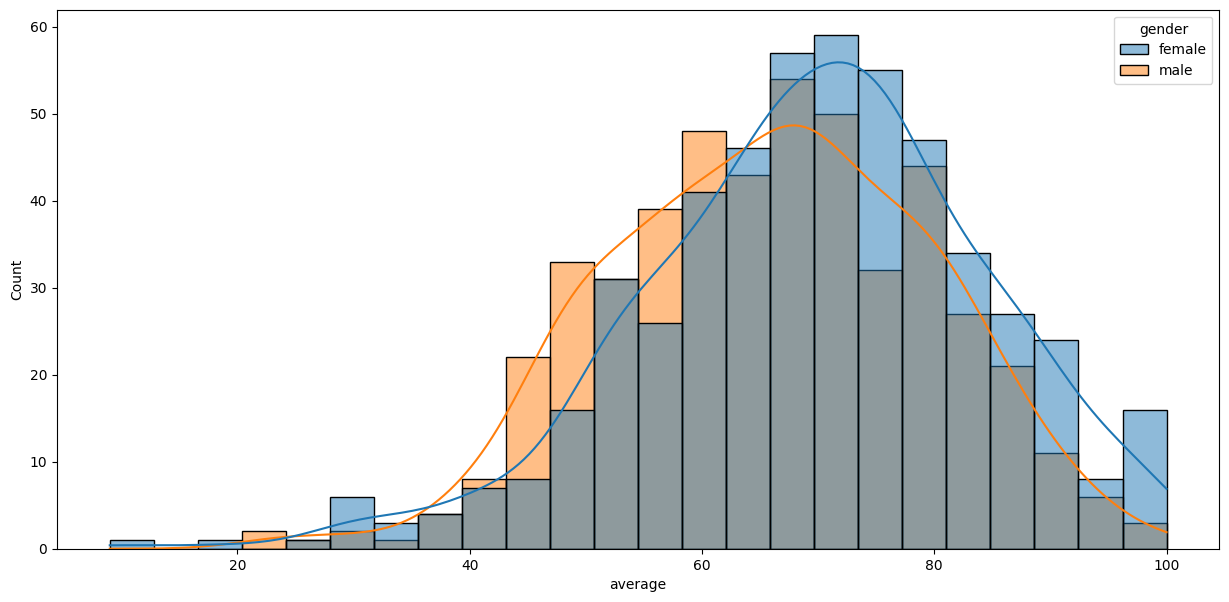

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

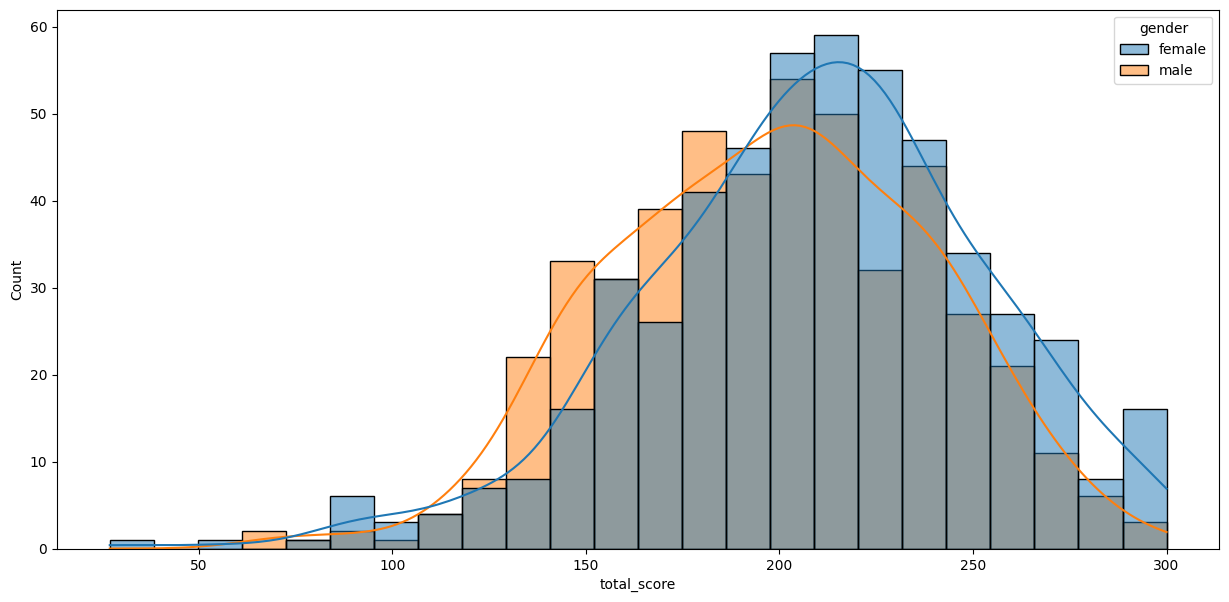

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

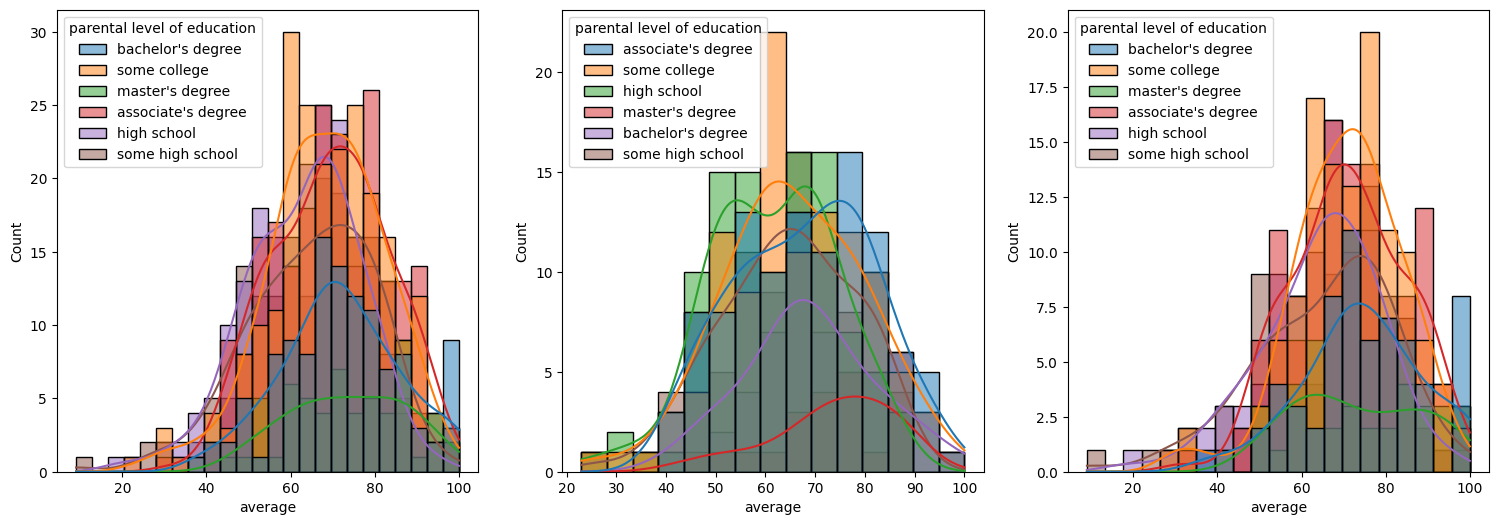

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

1. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
2. 3rd plot we can see there is no effect of parent's education on female students.

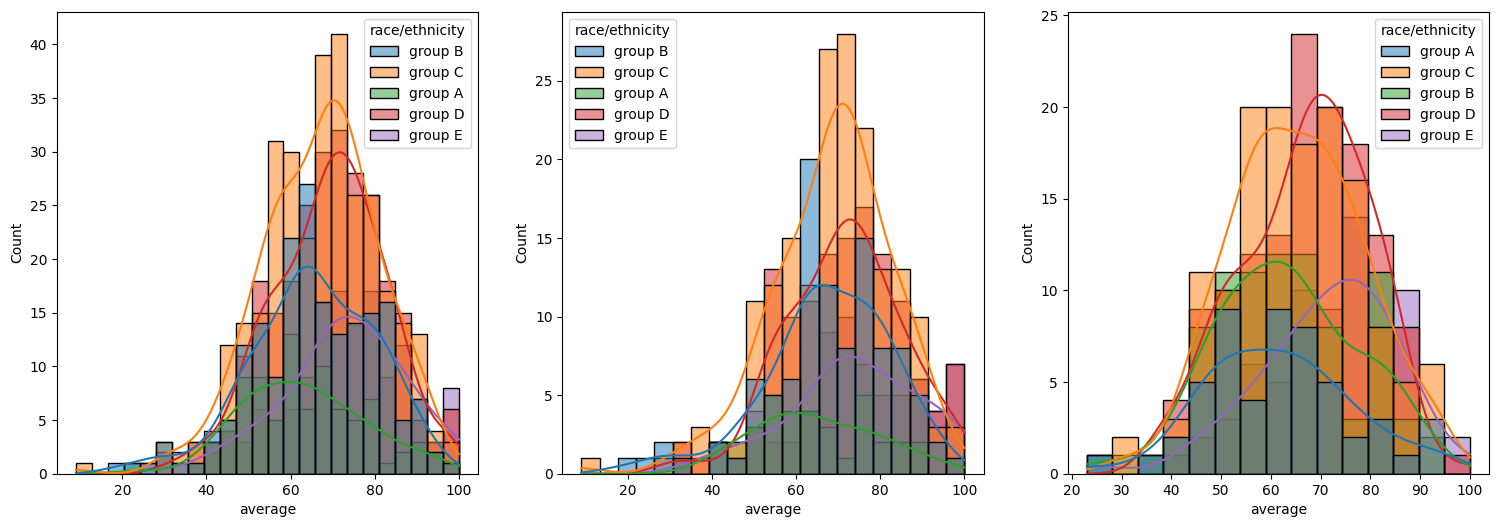

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Students of group A, group B and group E tends to perform poorly in exam irrespective of whether they are male or female

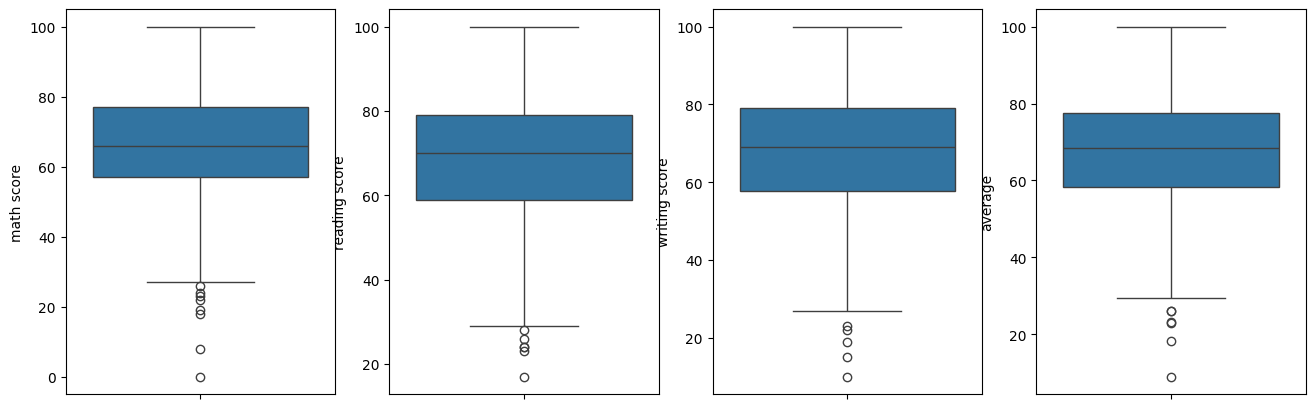

In [22]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'])
plt.subplot(142)
sns.boxplot(df['reading score'])
plt.subplot(143)
sns.boxplot(df['writing score'])
plt.subplot(144)
sns.boxplot(df['average'])
plt.show()

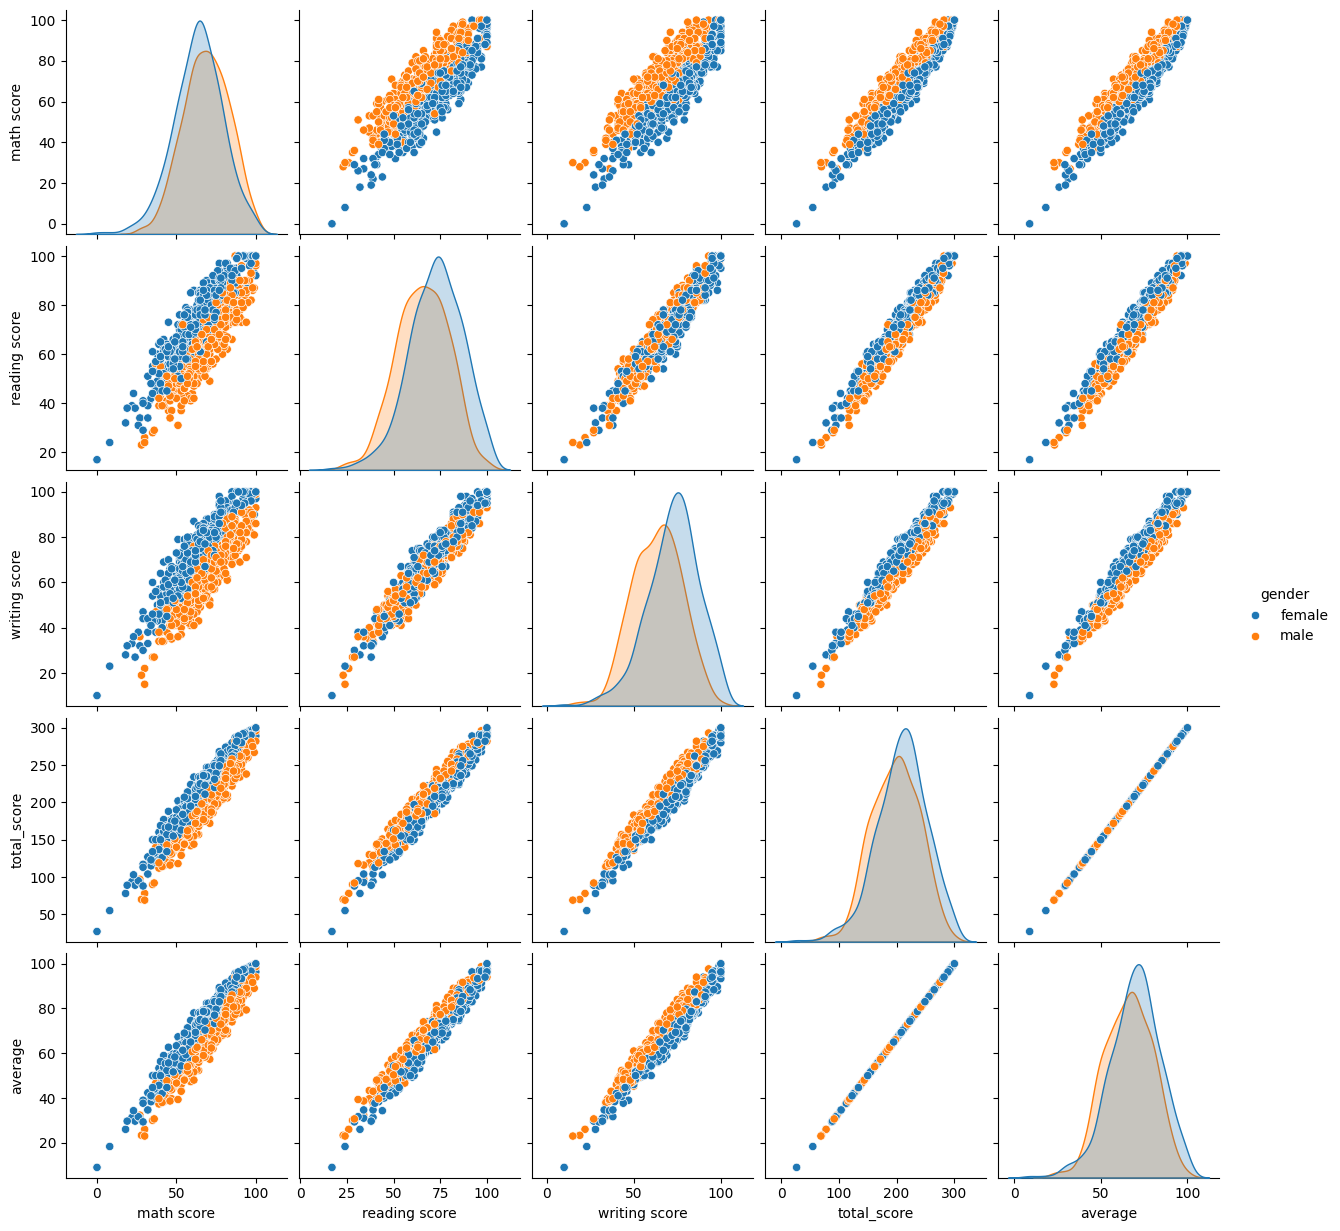

In [23]:
sns.pairplot(df,hue = 'gender')
plt.show()